In [4]:
import numpy as np
from graph import *
from dijkstra1 import *
from docplex.cp.model import CpoModel
import docplex.cp.model as cp
import numpy as np
from Fonctions import *

In [ ]:
#tracé en fonction de la densité
all_N = [i for i in range(6, 25)]

all_N = [7, 13, 21, 35]
densities = [0.15, 0.2, 0.25, 0.3, 0.35, 0.45, 0.5, 0.65, 0.8]

dico = {n : {d : 0 for d in densities} for n in all_N}

for N in all_N:
    for density in densities:
        liste = []
        for i in range(20):
            #N = random.choice(all_N)
            #nb_vertices = random.randint(2, N-2)

            nb_vertices = N * density

            print(N, nb_vertices)

            graph = generate_random_graph(N, nb_vertices, 1, 1)

            V, adj_mat = compute_V_adjmat(graph)

            highest_deg = np.max(np.sum(adj_mat, axis = 1))

            name_edge, all_edges = compute_edges(V, adj_mat)

            A = powers_A(adj_mat)

            taille_PCC = compute_taille_pcc(V, A)

            PCC, rev_PCC = compute_PCC_revPCC(V, graph, taille_PCC, all_edges, name_edge)

            ksi = chromatic_number(adj_mat)

            mdl = model(adj_mat, all_edges, PCC, rev_PCC)
            msol = mdl.solve(TimeLimit = 60, LogVerbosity = 'Quiet')
            solution_x = [msol.get_value(f"x_{i}") for i in range(N)]

            #print("ksi =", ksi, "       |S| =", sum(solution_x), "         highest_deg = ", highest_deg)
            if not ksi <= highest_deg or not highest_deg <= sum(solution_x):
                print("chiant")
                break
            liste.append(sum(solution_x))
        dico[N][density] = sum(liste)/len(liste)

In [ ]:
#mélanger tous les résultats pour scatter
all_N = [i for i in range(6, 25)]

X, Y = [], []

for i in range(100):
    #if i%10==0:
    #    print(i)
    N = random.choice(all_N)
    nb_vertices = random.randint(1, N-2)
    
    graph = generate_random_graph(N, nb_vertices, 1, 1)

    V, adj_mat = compute_V_adjmat(graph)

    highest_deg = np.max(np.sum(adj_mat, axis = 1))

    name_edge, all_edges = compute_edges(V, adj_mat)

    A = powers_A(adj_mat)

    taille_PCC = compute_taille_pcc(V, A)

    PCC, rev_PCC = compute_PCC_revPCC(V, graph, taille_PCC, all_edges, name_edge)

    ksi = chromatic_number(adj_mat)

    mdl = model(adj_mat, all_edges, PCC, rev_PCC)
    msol = mdl.solve(TimeLimit = 60, LogVerbosity = 'Quiet')
    solution_x = [msol.get_value(f"x_{i}") for i in range(N)]

    #print("ksi =", ksi, "       |S| =", sum(solution_x), "         highest_deg = ", highest_deg)
    if not highest_deg <= sum(solution_x):
        print("chiant")
        break

    density = round(nb_vertices/N,2)
    X.append(density)
    Y.append(sum(solution_x)/N)

In [ ]:
tmp_X = list(set(X))
new_X, new_Y = [], []
for density in tmp_X:
    indices = [i for i, x in enumerate(X) if x == density]
    new_X.append(density)
    new_Y.append(np.mean([Y[ind] for ind in indices]))
    

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(new_X, new_Y)

In [ ]:
dico[7][0.35] = 5.8
plt.scatter(dico[7].keys(), dico[7].values())
plt.plot(dico[7].keys(), dico[7].values())
plt.xlabel("Density of the graph")
plt.ylabel("$S_{opt}$")
plt.title("$S_{opt}$ for N = 7")
plt.savefig("plot7.pdf")

In [ ]:
plt.scatter(dico[13].keys(), dico[13].values())
plt.plot(dico[13].keys(), dico[13].values())
plt.xlabel("Density of the graph")
plt.ylabel("$S_{opt}$")
plt.title("$S_{opt}$ for N = 13")
plt.savefig("plot13.pdf")

In [ ]:
plt.scatter(dico[21].keys(), dico[21].values())
plt.plot(dico[21].keys(), dico[21].values())
plt.xlabel("Density of the graph")
plt.ylabel("$S_{opt}$")
plt.title("$S_{opt}$ for N = 21")
plt.savefig("plot21.pdf")

In [ ]:
plt.scatter(dico[35].keys(), dico[35].values())
plt.plot(dico[35].keys(), dico[35].values())
plt.xlabel("Density of the graph")
plt.ylabel("$S_{opt}$")
plt.title("$S_{opt}$ for N = 35")
plt.savefig("plot35.pdf")

In [ ]:
all_N = [i for i in range(6, 30)]

S, H = {n : [] for n in all_N}, {n : [] for n in all_N}

for i in range(500):
    #if i%10==0:
    #    print(i)
    N = random.choice(all_N)
    nb_vertices = random.randint(1, N-2)
    
    #print(N, nb_vertices)

    graph = generate_random_graph(N, nb_vertices, 1, 1)

    V, adj_mat = compute_V_adjmat(graph)

    highest_deg = np.max(np.sum(adj_mat, axis = 1))

    name_edge, all_edges = compute_edges(V, adj_mat)

    A = powers_A(adj_mat)

    taille_PCC = compute_taille_pcc(V, A)

    PCC, rev_PCC = compute_PCC_revPCC(V, graph, taille_PCC, all_edges, name_edge)

    ksi = chromatic_number(adj_mat)

    mdl = model(adj_mat, all_edges, PCC, rev_PCC)
    msol = mdl.solve(TimeLimit = 60, LogVerbosity = 'Quiet')
    solution_x = [msol.get_value(f"x_{i}") for i in range(N)]

    print("ksi =", ksi, "       |S| =", sum(solution_x), "         highest_deg = ", highest_deg)
    if not highest_deg <= sum(solution_x):
        print("chiant")
        break

    S[N].append(sum(solution_x))
    H[N].append(highest_deg)

In [ ]:
tot = []
for N in all_N:
    S[N] = np.mean(S[N])
    H[N] = np.mean(H[N])
    tot.append(H[N]/S[N])

In [ ]:
print(np.mean(tot))

In [ ]:
for N in all_N:
    print(H[N]/S[N])

In [ ]:
plt.ylim(0, 1)
plt.plot(all_N, tot, label = "rate")
plt.plot([all_N[0], all_N[-1]], [np.mean(tot), np.mean(tot)], label = "mean = "+str(round(np.mean(tot),2)))
plt.xlabel("N")
plt.ylabel("highest degree / |S|")
plt.grid()
plt.legend()
plt.savefig("rate_bound.pdf")

[6 7 5 5 5 6 4 4 6 4 5 6 5 4 4 5 6 4 5 6 4 4 4 4 4]
7
[1]
[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]


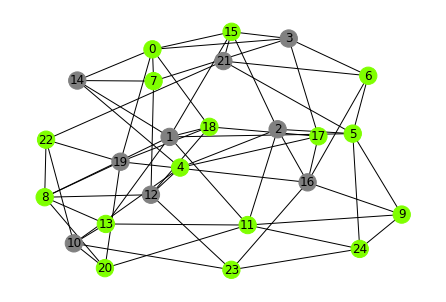

In [5]:
#exemple tout-en-1
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

N = 25
edges_per_N = 4

graph = generate_random_graph(N, edges_per_N, 1, 1)

V, adj_mat = compute_V_adjmat(graph)

highest_deg = np.max(np.sum(adj_mat, axis = 1))
all_deg = np.sum(adj_mat, axis = 1)
print(all_deg)
print(highest_deg)
ind = np.where(all_deg == highest_deg)[0]

print(ind)

color_map = ['gray']*N
#for i in ind:
#    color_map[i] = 'orange'

name_edge, all_edges = compute_edges(V, adj_mat)

A = powers_A(adj_mat)

taille_PCC = compute_taille_pcc(V, A)

PCC, rev_PCC = compute_PCC_revPCC(V, graph, taille_PCC, all_edges, name_edge)

ksi = chromatic_number(adj_mat)

mdl = model(adj_mat, all_edges, PCC, rev_PCC)
msol = mdl.solve(TimeLimit = 60, LogVerbosity = 'Quiet')
solution_x = [msol.get_value(f"x_{i}") for i in range(N)]

print(solution_x)

for i in range(N):
    if solution_x[i]==1:
        color_map[i] = 'chartreuse'

G = nx.from_numpy_matrix(np.matrix(adj_mat))
fig1 = plt.figure(1)
nx.draw(G, node_color = color_map, with_labels=True)
plt.savefig("Big_Example2.pdf")
plt.show()